## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (5 marks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score,precision_score,confusion_matrix,classification_report,accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars_data=pd.read_csv('vehicle-1.csv')

In [3]:
#Print first 10 rows of data
cars_data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

The dataset has 846 rows and 19 columns

All the input features are numerics of type integer or float. Only the class/target feature is of type object, as it is categorical in nature.

There are few null/missing values present in the dataset

In [5]:
#CHECK WHICH COLUMN HAS HOW MANY NULL VALUES
cars_data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
#there are very few null values

In [7]:
#It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation)

cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


If skewness is less than -1 or greater than 1, the distribution is highly skewed.


If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.


If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [8]:
cars_data.skew()


compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64


By analysing it, we can see that

-compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.

-radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution

a) skewness_about_1 value is about 15(average) for cars_data which is quite high compared to other 2 groups. So if value is nearby 15
then there is a chance that the vehicle is a car

b) scaled_variance_ value is about 300(average) for vans which is quite low compared to other 2 groups. So if value is nearby 300
then there is a chance that the vehicle is a van

c) skewness_about_1 value is about 15(average) for cars_data which is quite high compared to other 2 groups. So if value is nearby 15
then there is a chance that the vehicle is a car

array([[<AxesSubplot:title={'center':'compactness'}>,
        <AxesSubplot:title={'center':'circularity'}>,
        <AxesSubplot:title={'center':'distance_circularity'}>,
        <AxesSubplot:title={'center':'radius_ratio'}>],
       [<AxesSubplot:title={'center':'pr.axis_aspect_ratio'}>,
        <AxesSubplot:title={'center':'max.length_aspect_ratio'}>,
        <AxesSubplot:title={'center':'scatter_ratio'}>,
        <AxesSubplot:title={'center':'elongatedness'}>],
       [<AxesSubplot:title={'center':'pr.axis_rectangularity'}>,
        <AxesSubplot:title={'center':'max.length_rectangularity'}>,
        <AxesSubplot:title={'center':'scaled_variance'}>,
        <AxesSubplot:title={'center':'scaled_variance.1'}>],
       [<AxesSubplot:title={'center':'scaled_radius_of_gyration'}>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration.1'}>,
        <AxesSubplot:title={'center':'skewness_about'}>,
        <AxesSubplot:title={'center':'skewness_about.1'}>],
       [<AxesSubplot:tit

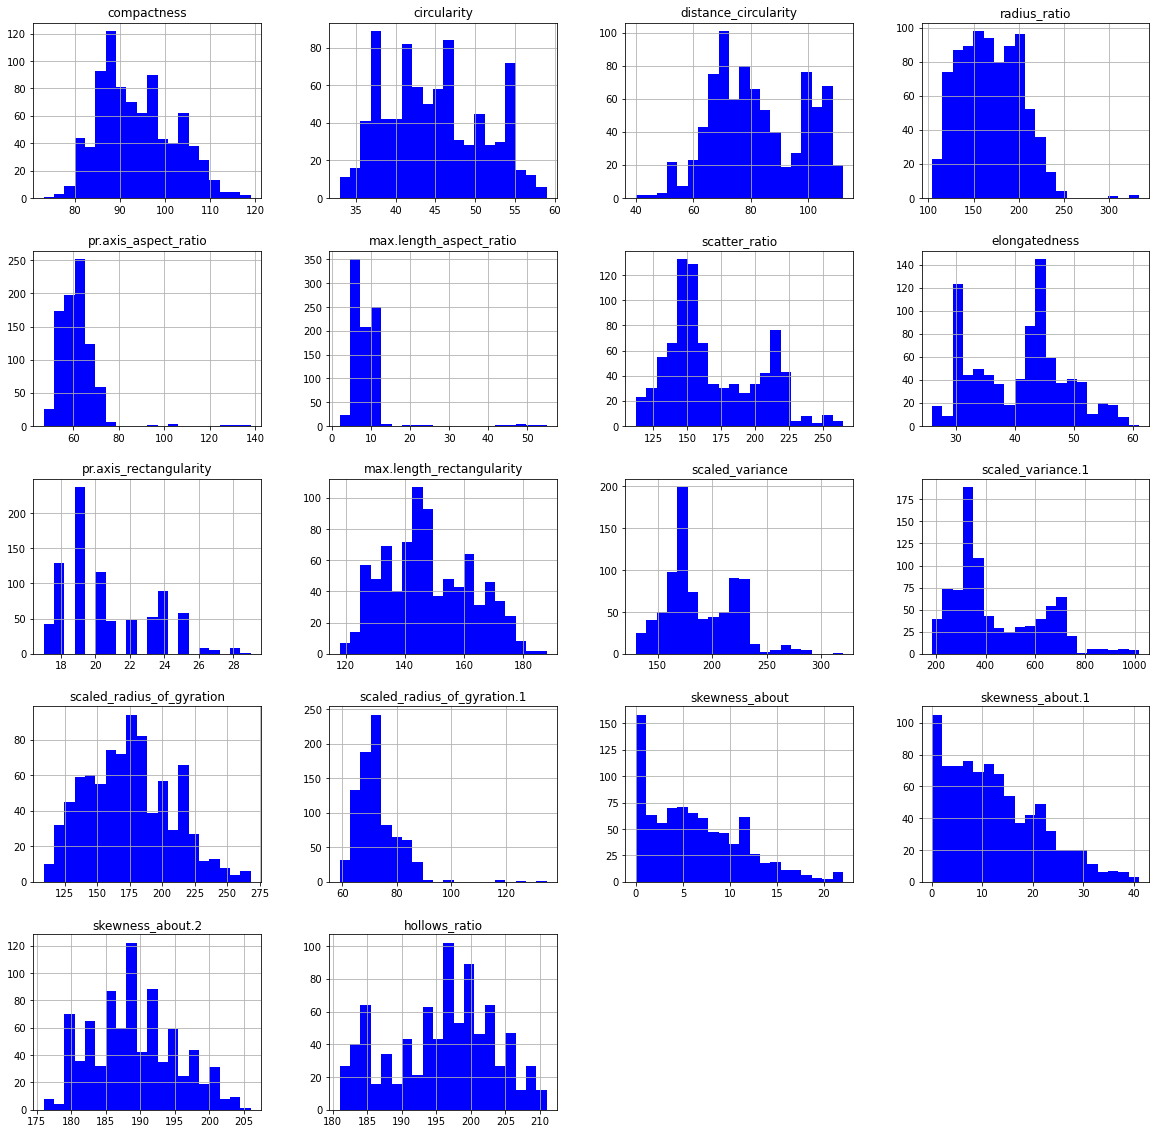

In [9]:
cars_data.hist(figsize=(20,20), bins=20, color='blue')

In [10]:
#EVERY DATATYPE IS NUMBERS, EXCEPT CLASS, IT SHOULD BE CATEGORY , NOT OBJECT FOR CLASSIFIER TO WORK
cars_data['class']=cars_data['class'].astype('category')

In [11]:
cars_data1=cars_data.copy(deep=True)
cars_data1.dropna(how='any',inplace=True)

In [12]:
#replace missing values with meadian
for i in cars_data.columns[:18]:
    cars_data[i]=cars_data[i].fillna(cars_data[i].median())

In [13]:
cars_data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [14]:
cars_data.isna().sum()

#MO MISSING VALUES

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [15]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

* Now, as it shows there are no misisng values present in the features.

### Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points

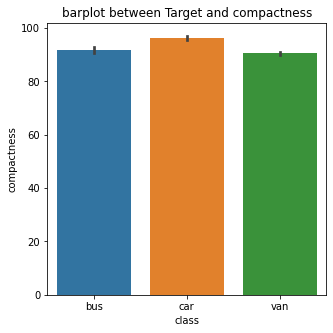

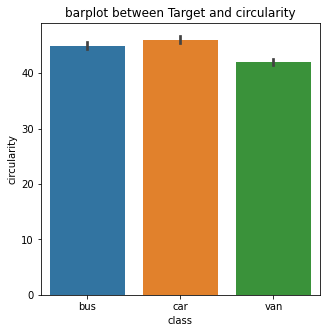

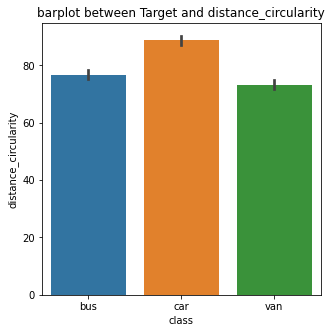

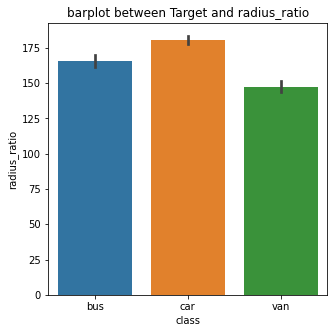

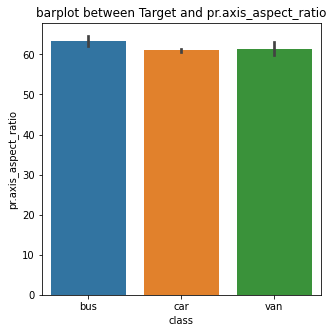

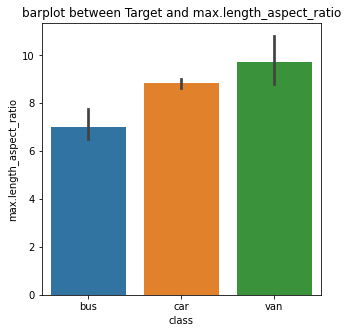

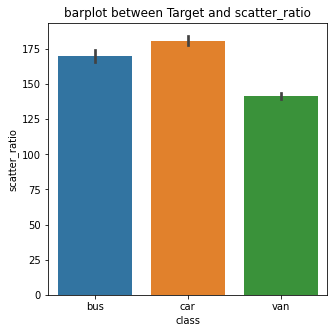

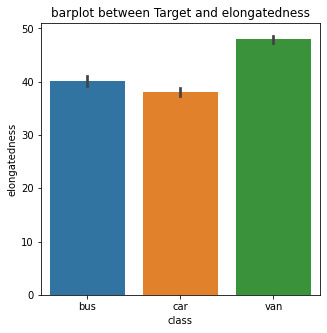

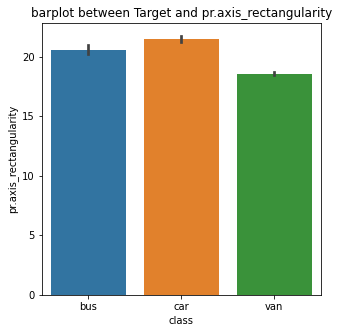

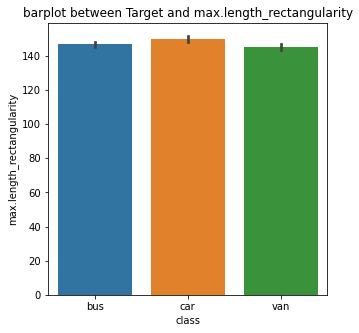

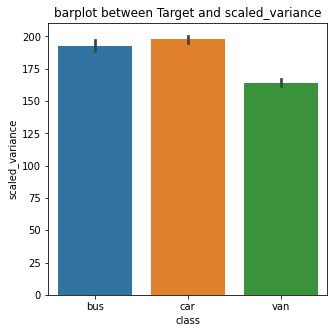

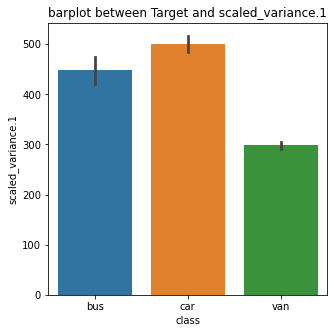

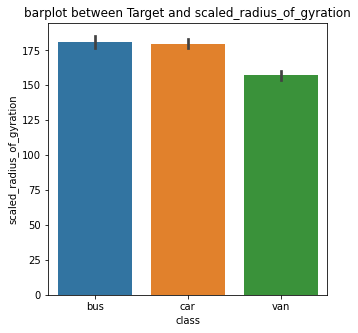

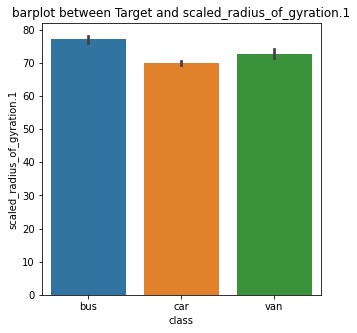

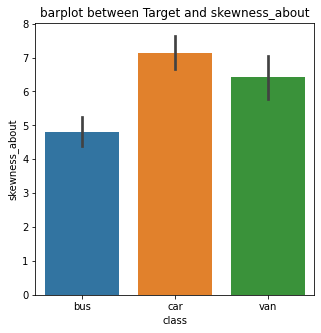

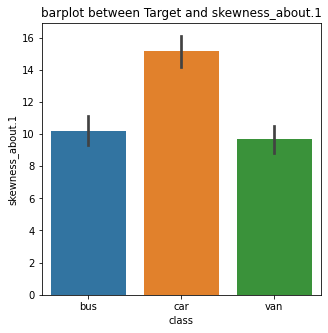

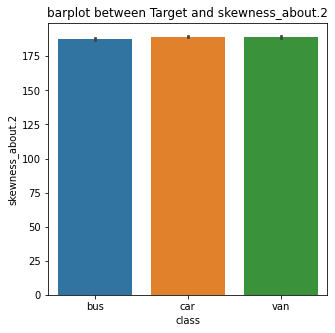

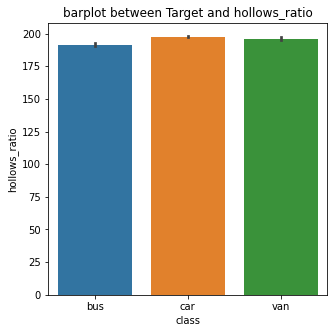

In [16]:
for i in cars_data.columns[:18]:
    plt.figure(figsize = (5,5))
    sns.barplot(y = cars_data[i], x = cars_data["class"])
    plt.title("barplot between Target and {}".format(i) )
    plt.xlabel('class')
    plt.ylabel(i)
    #plt.savefig("barplot/barplot for {} .jpg".format(num), dpi = 100, bbox_tight = True)

array([[<AxesSubplot:title={'center':'compactness'}>,
        <AxesSubplot:title={'center':'circularity'}>,
        <AxesSubplot:title={'center':'distance_circularity'}>,
        <AxesSubplot:title={'center':'radius_ratio'}>],
       [<AxesSubplot:title={'center':'pr.axis_aspect_ratio'}>,
        <AxesSubplot:title={'center':'max.length_aspect_ratio'}>,
        <AxesSubplot:title={'center':'scatter_ratio'}>,
        <AxesSubplot:title={'center':'elongatedness'}>],
       [<AxesSubplot:title={'center':'pr.axis_rectangularity'}>,
        <AxesSubplot:title={'center':'max.length_rectangularity'}>,
        <AxesSubplot:title={'center':'scaled_variance'}>,
        <AxesSubplot:title={'center':'scaled_variance.1'}>],
       [<AxesSubplot:title={'center':'scaled_radius_of_gyration'}>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration.1'}>,
        <AxesSubplot:title={'center':'skewness_about'}>,
        <AxesSubplot:title={'center':'skewness_about.1'}>],
       [<AxesSubplot:tit

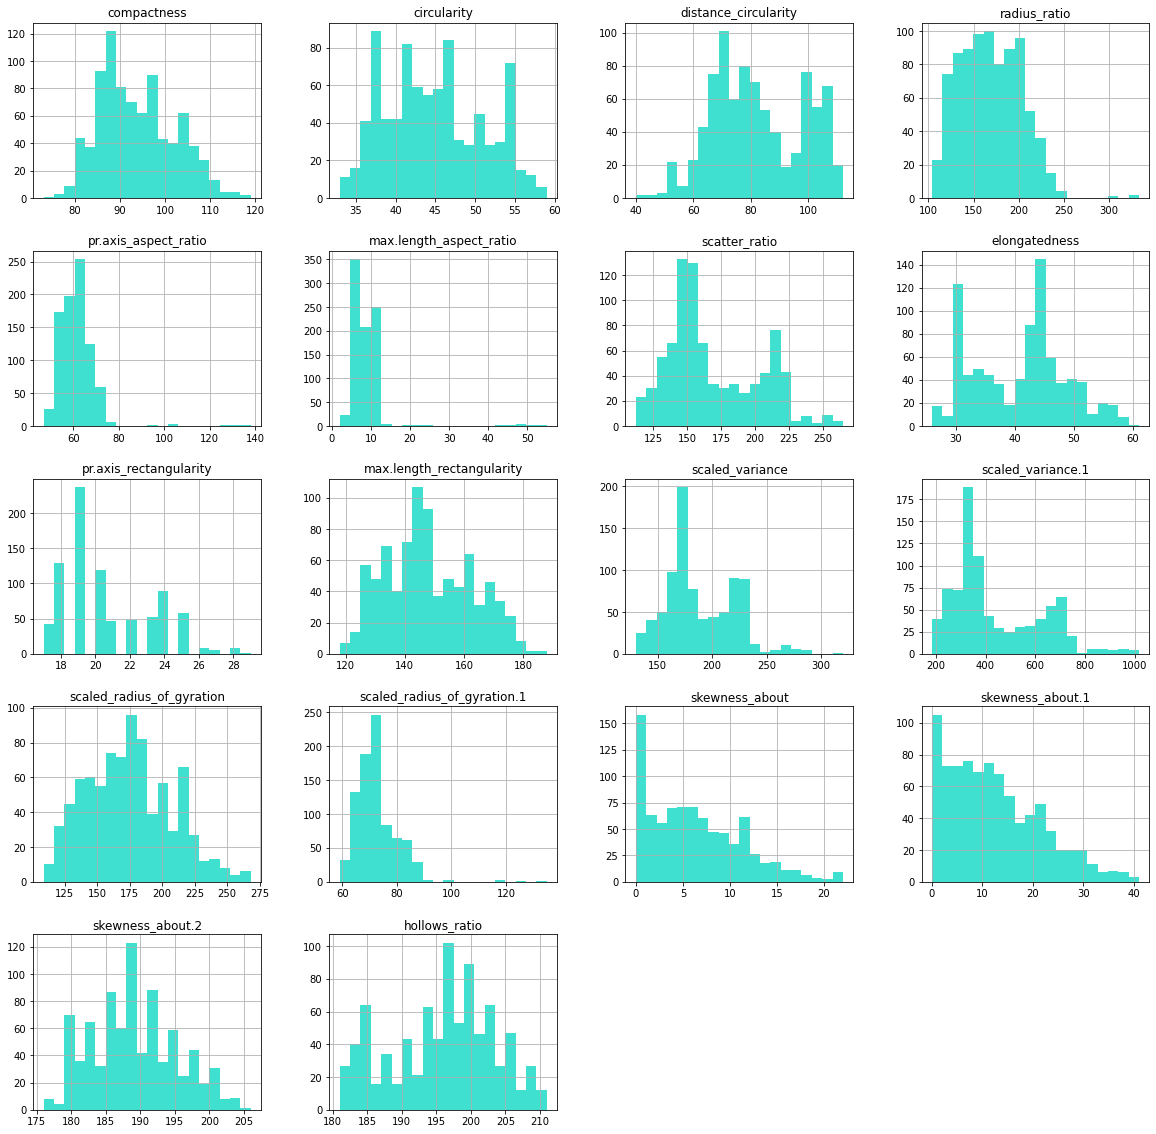

In [17]:
cars_data.hist(figsize=(20,20), bins=20, color='turquoise')

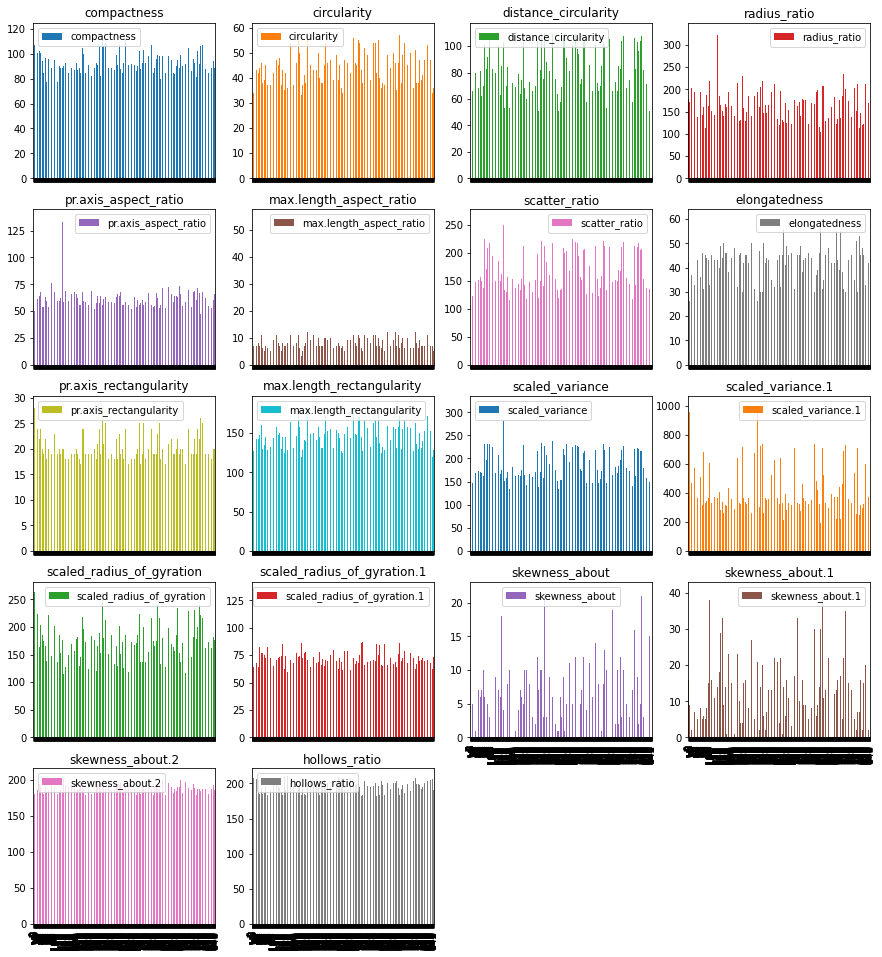

In [18]:
cars_data.plot(kind='bar',subplots=True,layout = (6,4), figsize=(15,20))
plt.show()

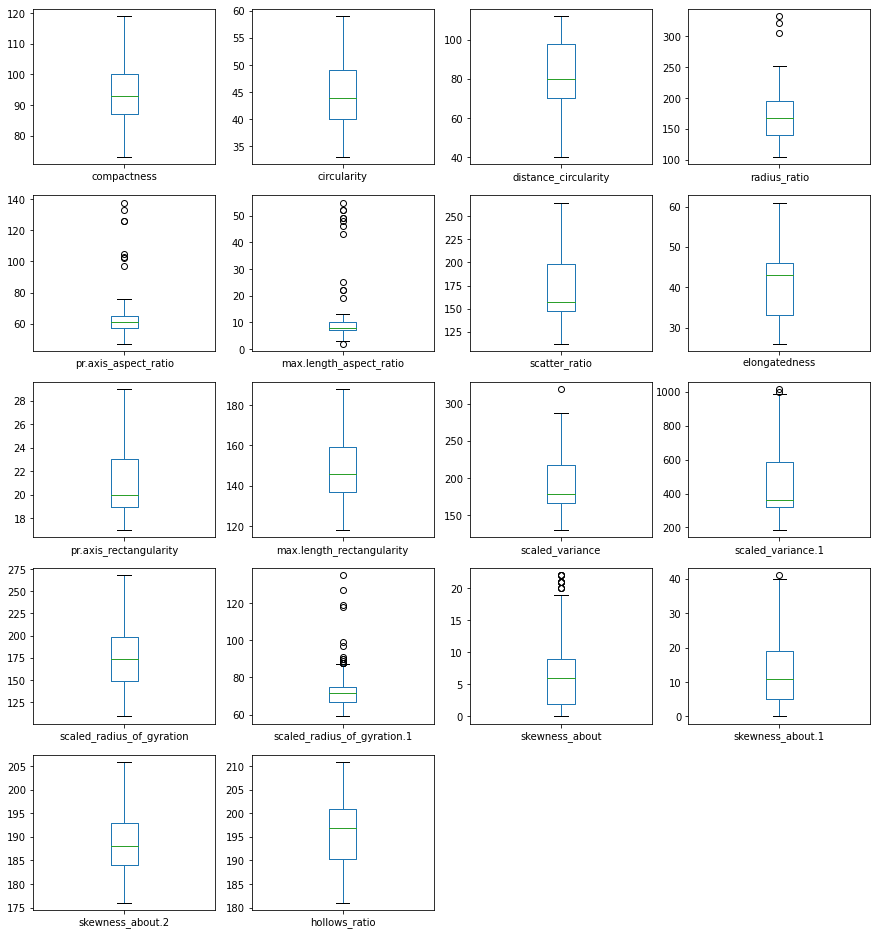

In [19]:
cars_data.plot(kind='box',subplots=True,layout = (6,4), figsize=(15,20))
plt.show()

<AxesSubplot:>

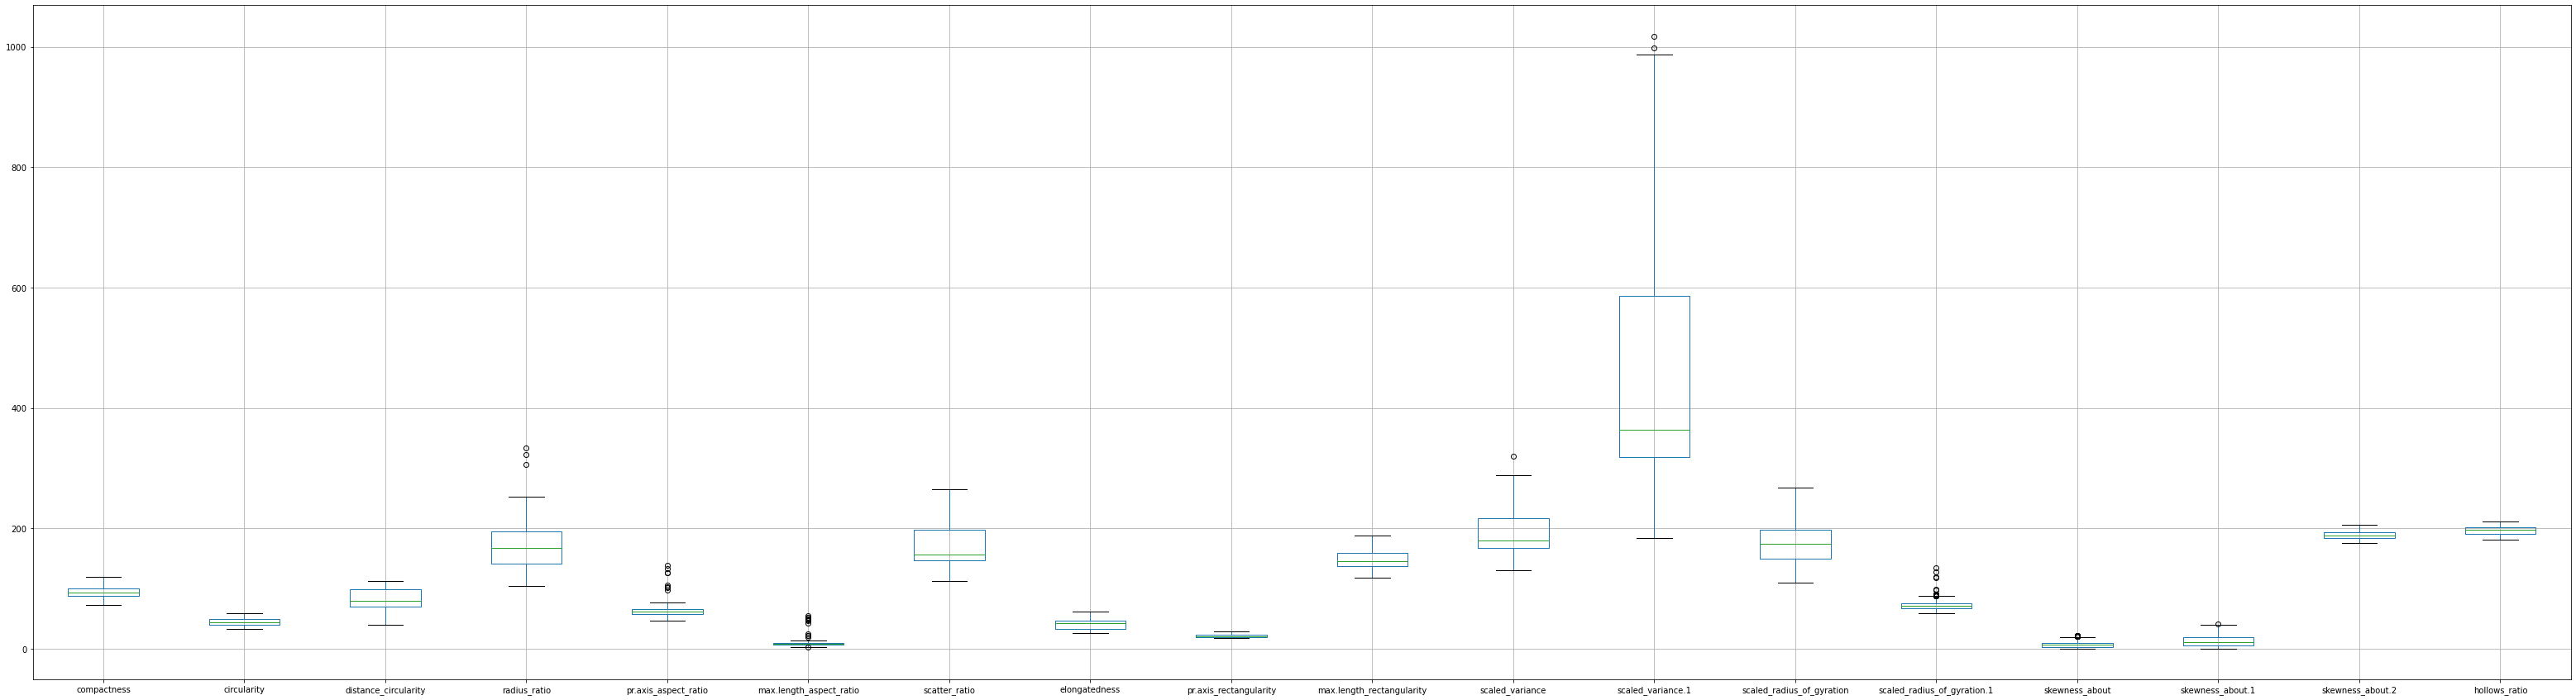

In [20]:
# Understand the spread and outliers in dataset using boxplot
cars_data.boxplot(figsize=(55,15))

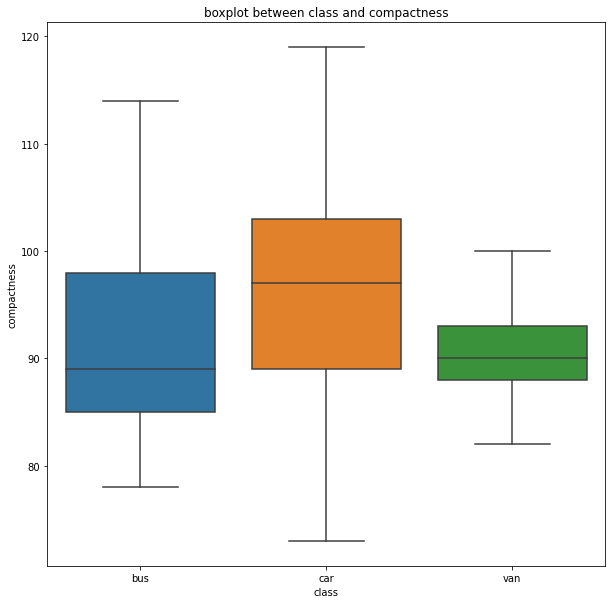

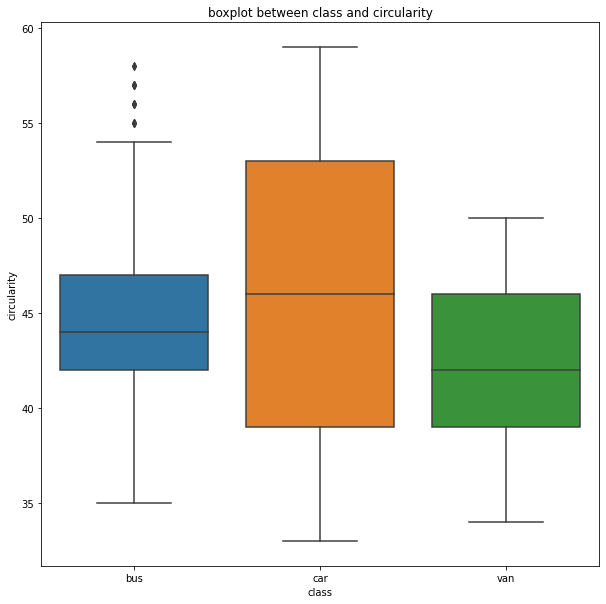

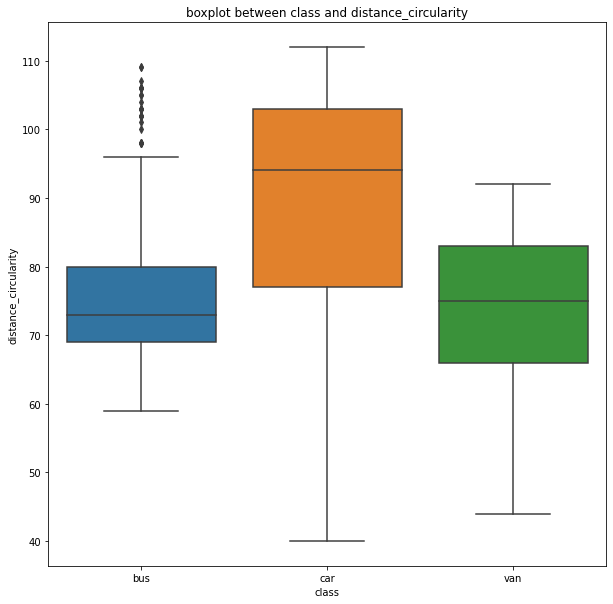

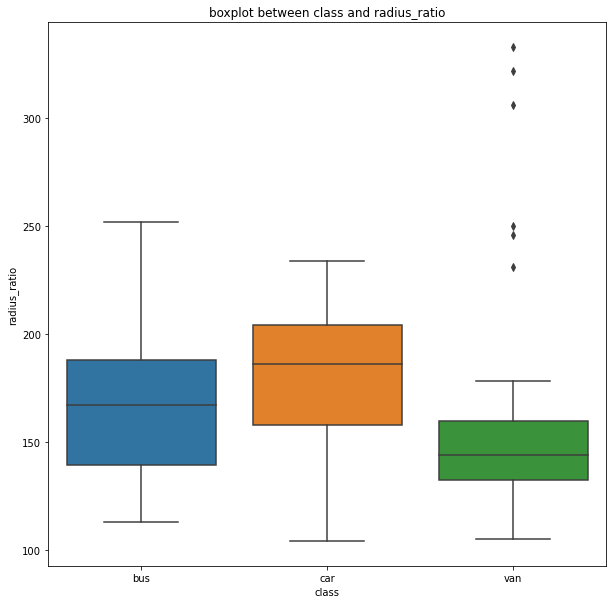

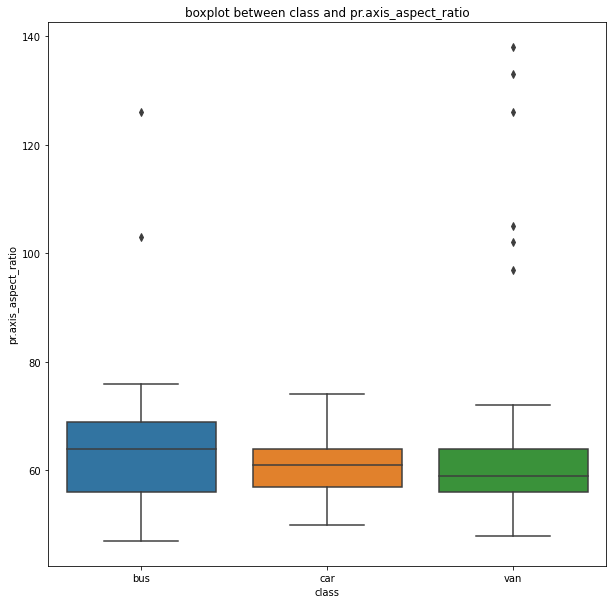

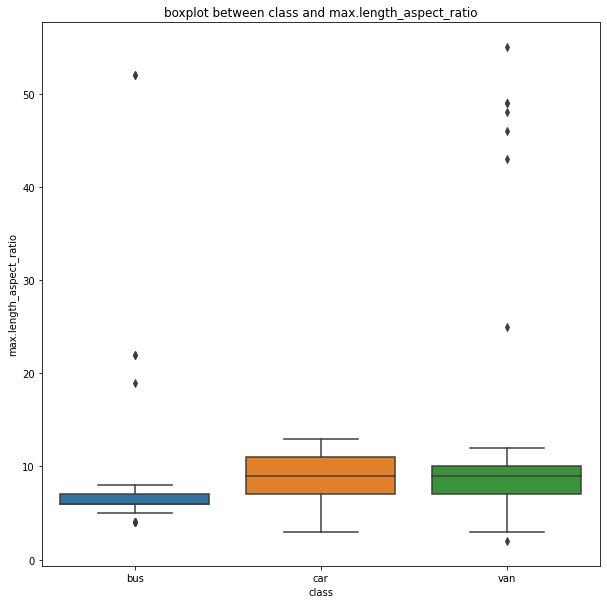

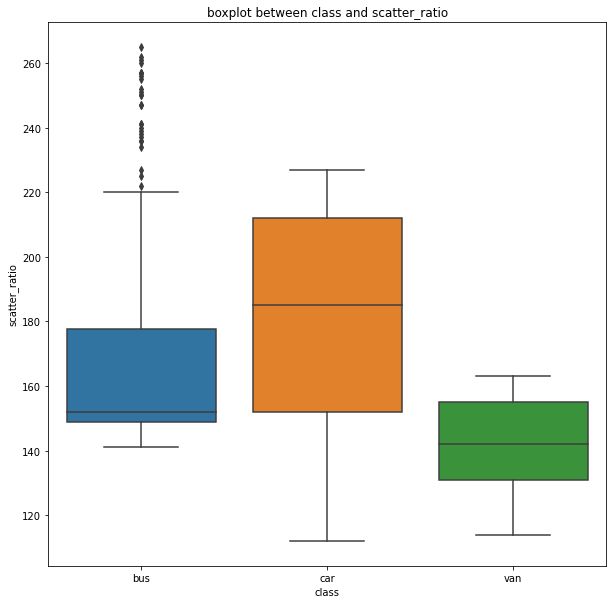

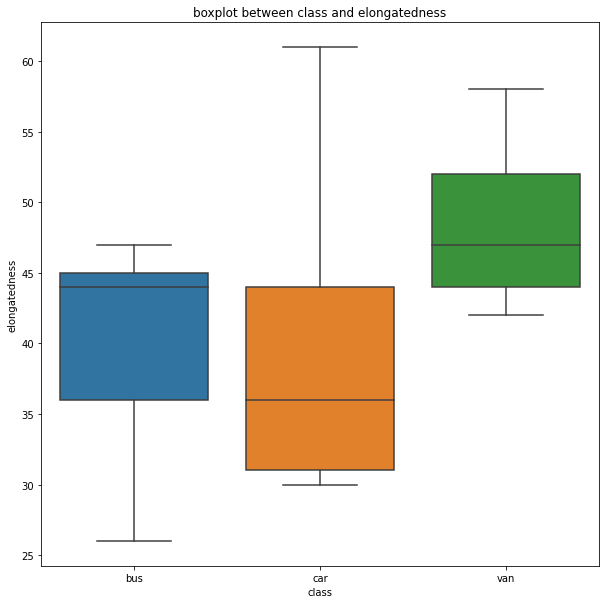

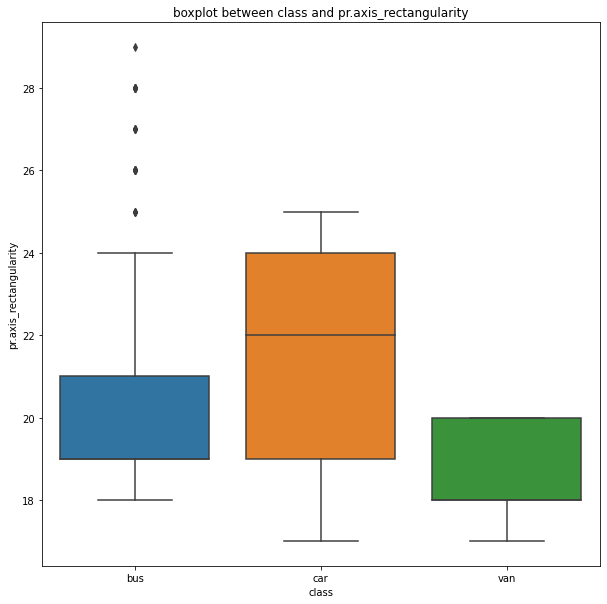

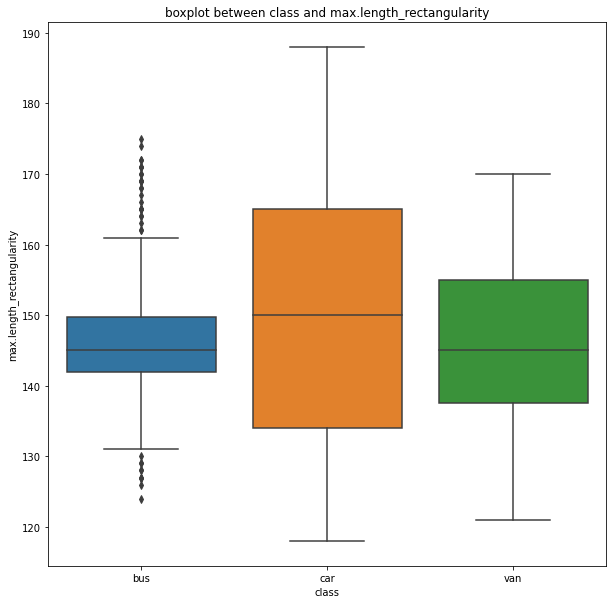

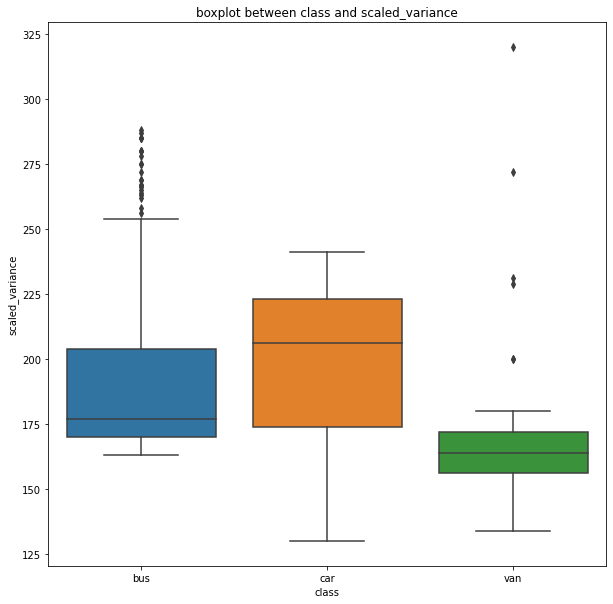

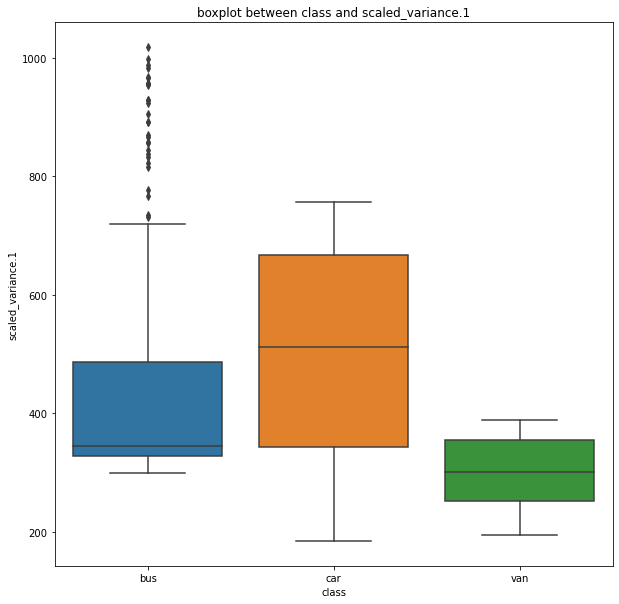

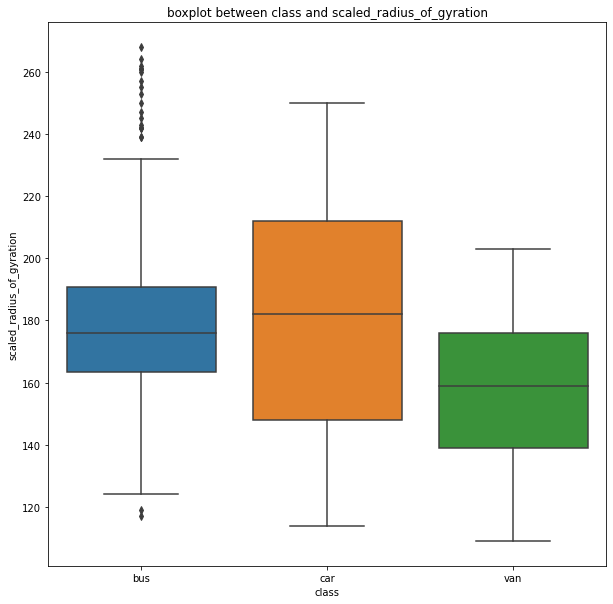

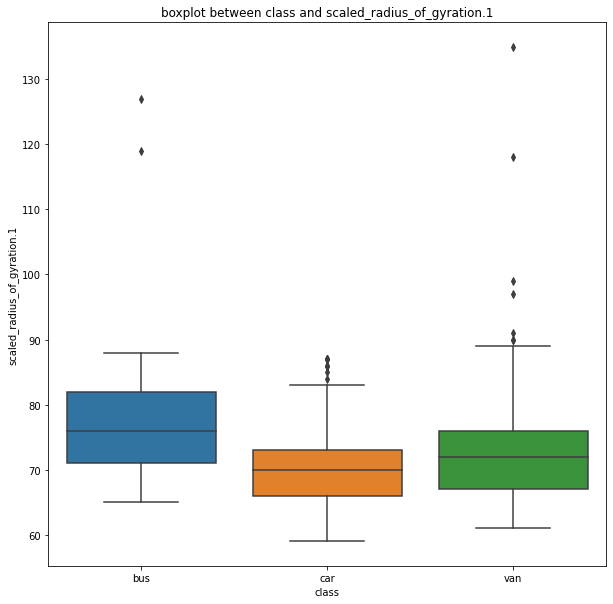

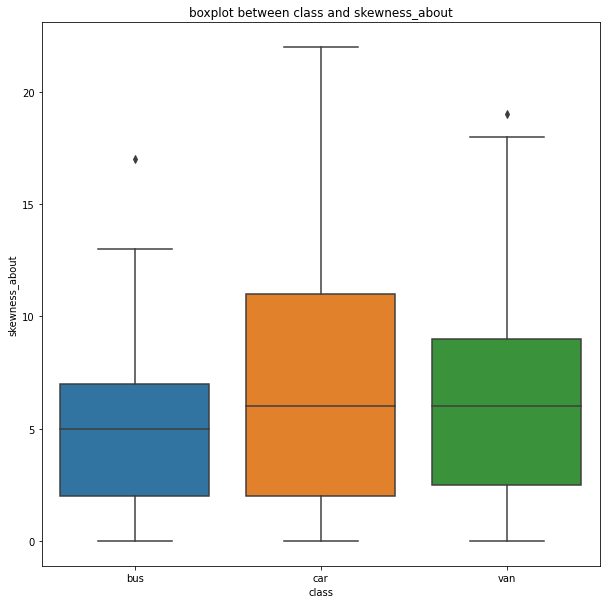

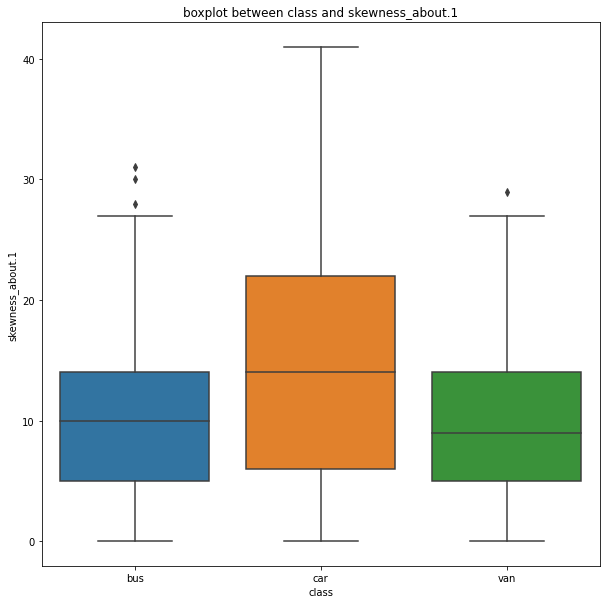

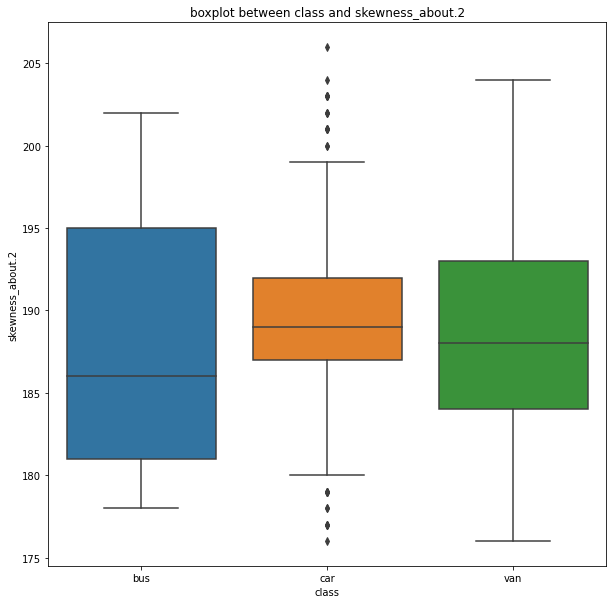

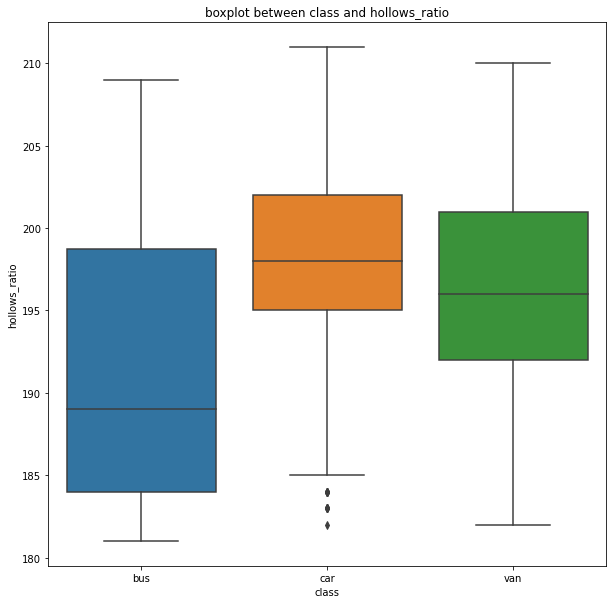

In [21]:
for i in cars_data.columns[:18]:
    plt.figure(figsize = (10,10))
    sns.boxplot(y = cars_data[i], x = cars_data['class'])
    plt.title("boxplot between class and {}".format(i) )
    plt.ylabel(i)
    plt.xlabel('class')
    #plt.savefig("boxplot_2/boxplot for {} .jpg".format(num), dpi = 100, bbox_tight = True)

In [22]:
#tHERE ARE FEW OUTLIERS , WE WILL KEEP THEM AS IT  IS

<AxesSubplot:>

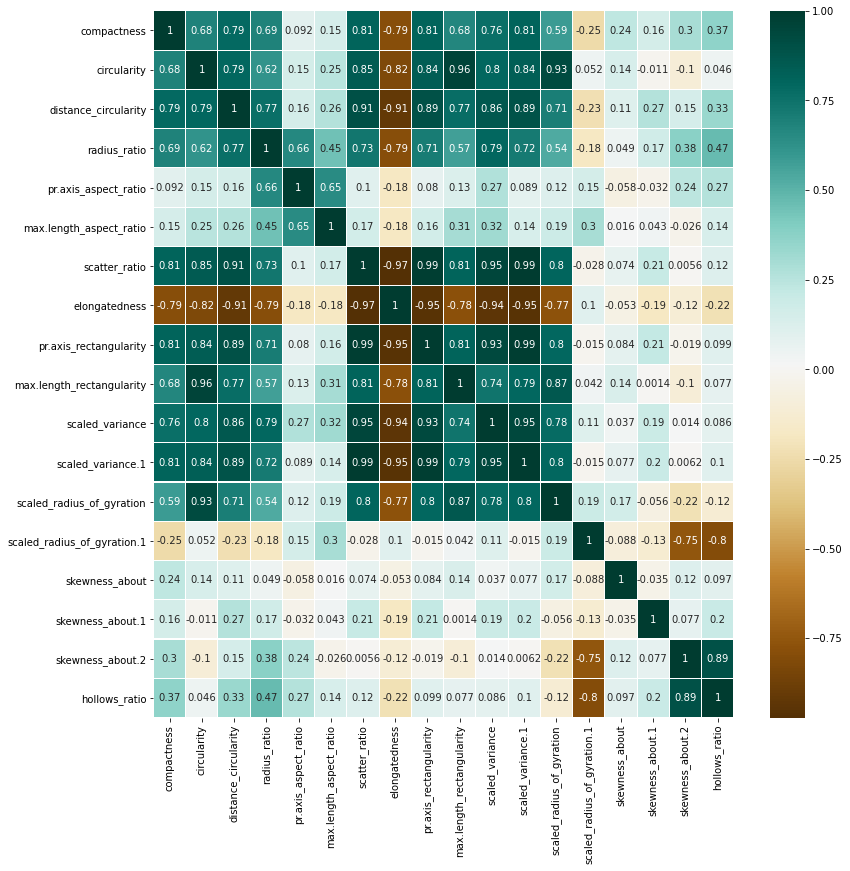

In [23]:
plt.figure(figsize=(13,13))
sns.heatmap(cars_data.corr(), annot=True, linewidths=0.1, cmap='BrBG')

In [24]:
print('Number of cars_data distribution\n', cars_data['class'].value_counts())

print('\nPercent of car distribution\n', 100*cars_data['class'].value_counts()/cars_data['class'].count())

Number of cars_data distribution
 car    429
bus    218
van    199
Name: class, dtype: int64

Percent of car distribution
 car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64


([<matplotlib.patches.Wedge at 0x283e5ff30c8>,
 [Text(-1.0997269741887397, -0.02450677950444806, 'car'),
  Text(0.82937597108028, -0.7225894398582384, 'bus'),
  Text(0.7408877038131637, 0.8130715899221039, 'van')],
 [Text(-0.5998510768302215, -0.013367334275153485, '50.7%'),
  Text(0.4523868933165163, -0.39413969446813, '25.8%'),
  Text(0.4041205657162711, 0.4434935945029657, '23.5%')])

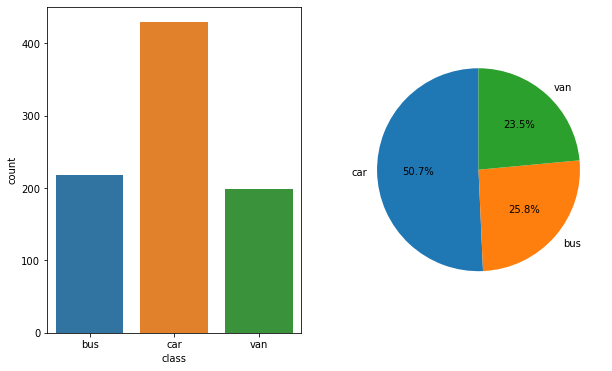

In [25]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

sns.countplot(cars_data['class'])
plt.subplot(1,2,2)
plt.pie(cars_data['class'].value_counts(),autopct='%1.1f%%',startangle=90 ,labels=cars_data['class'].value_counts().index)

Observation

The ratio of car to bus to van in the dataset is close to 2:1:1. the car types vehicles includes 2 different types of cars_data i.e. Saab 9000 and an Opel Manta 400. Hence we can consider this dataset to be almost balanced dataset in terms target classes

In [26]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
cars_data['class']=labelencoder.fit_transform(cars_data['class'])

In [27]:
cars_data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,1
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,2
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,1


### Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (2 marks)

In [28]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X=cars_data.iloc[:,0:18]
y=cars_data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

### Train a Support vector machine using the train set and get the accuracy on the test set (5 marks)

In [29]:
from sklearn.svm import SVC

In [30]:
svc=SVC()

In [31]:
svc1=svc.fit(X_train, y_train)

In [32]:
prediction=svc1.predict(X_test)

In [33]:
svc1.score(X_train, y_train)

0.6624605678233438

In [34]:
svc1.score(X_test,y_test)

0.6698113207547169

In [35]:
# check the accuracy on the training data
print('Accuracy on Training data: ',svc1.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',svc1.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',precision_score(y_test,prediction, average='macro'))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))
print("Classification Report:\n",classification_report(prediction,y_test))

Accuracy on Training data:  0.6624605678233438
Accuracy on Testing data:  0.6698113207547169
Recall value:  0.6622710622710622
Precision value:  0.662184755883386
Confusion Matrix:
 [[27  3  9]
 [23 76  1]
 [15 19 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.69      0.52        39
           1       0.78      0.76      0.77       100
           2       0.80      0.53      0.64        73

    accuracy                           0.67       212
   macro avg       0.66      0.66      0.64       212
weighted avg       0.72      0.67      0.68       212



In [36]:
#MODEL NOT PERFORMING WELL

### Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (5 points)

In [37]:
# Scaling the independent attributes using zscore
from scipy.stats import zscore 
X_z=X.apply(zscore)

In [38]:
#CONVERT ALL VALUES ON SSAME SCALE USING ZSCORE, AS SVM USES DISTANCE CALCULATIONS

In [39]:
from sklearn.decomposition import PCA
pca=PCA(random_state=1)
pca.fit(X_z)

PCA(random_state=1)

In [40]:
#Now we find the Eigen Values
print('EIGEN VALUES', pca.explained_variance_) 

EIGEN VALUES [9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [41]:
print()
print('EIGEN VECTOR', pca.components_)


EIGEN VECTOR [[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14

In [42]:
print('Now we find the % of variation explained by each eigen vector', pca.explained_variance_ratio_ *100)

Now we find the % of variation explained by each eigen vector [5.21860337e+01 1.67297684e+01 1.05626388e+01 6.54745969e+00
 5.08986889e+00 2.99641300e+00 1.99136623e+00 1.23150069e+00
 8.91215289e-01 5.09714695e-01 3.69004485e-01 2.58586200e-01
 1.98624491e-01 1.52109243e-01 1.14194232e-01 9.94191854e-02
 5.56329946e-02 1.64497408e-02]


In [43]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

In [44]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [45]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.404602609088709,
  array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
          0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
          0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
          0.05822502,  0.03027951,  0.07414539])),
 (3.0149220585246317,
  array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
         -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
         -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
          0.12408509,  0.54091477,  0.54035426])),
 (1.9035250218389674,
  array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
         -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
         -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
          0.07528289, -0.00873592, -0.03952427])),
 (1.1799374684450201,
  array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
         -0.03141473

In [46]:
# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigenvalues)

Eigenvalues in descending order: 
[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.96445743e-03 1.00257898e-02 2.74120657e-02
 1.79166314e-02 2.05792871e-02]


In [47]:
#### Finding variance and cummulative variance by each eigenvector

Variance explained [52.186033653007335, 16.729768449260003, 10.562638845901807, 6.547459685027855, 5.089868891293837, 2.996412998004299, 1.9913662309583733, 1.2315006916147833, 0.8912152886569108, 0.5097146950939809, 0.3690044847720544, 0.2585861999500018, 0.1986244909477125, 0.15210924315687954, 0.11419423151366442, 0.09941918544943276, 0.055632994622964636, 0.016449740768075993]
Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


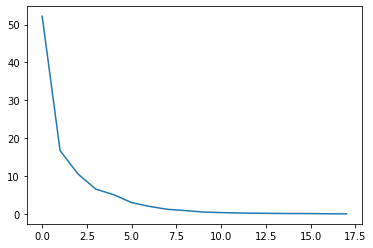

In [48]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
print("Variance explained", var_exp)

cum_var_exp = np.cumsum(var_exp)# an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

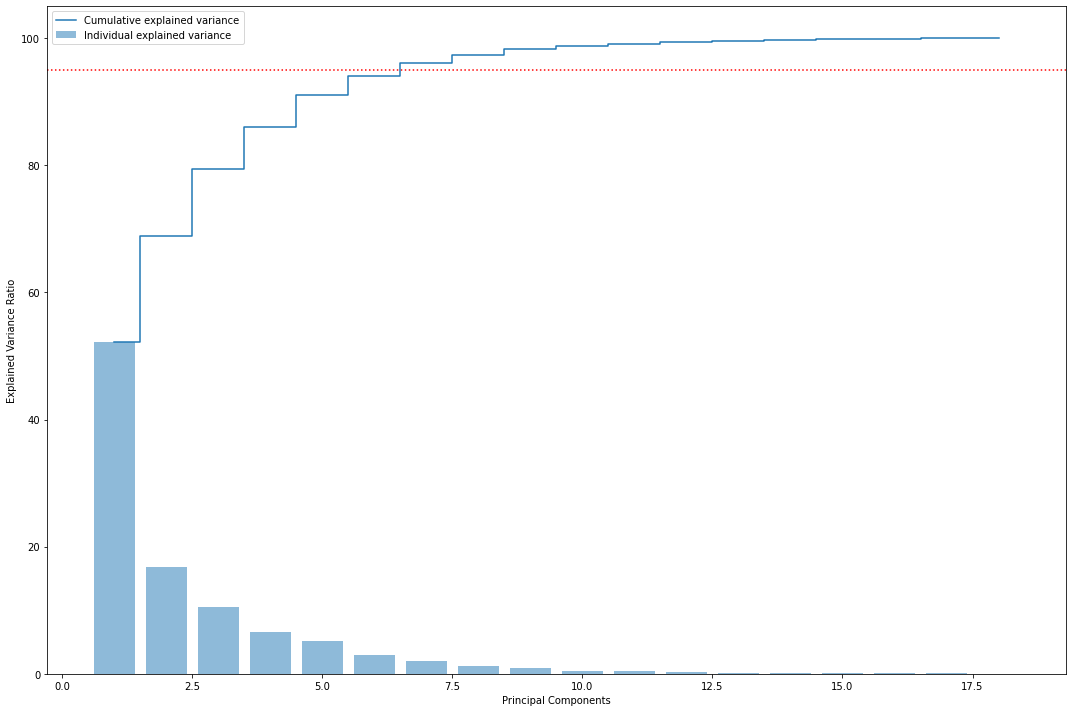

In [49]:
# Ploting 
plt.figure(figsize=(15 , 10))
plt.axhline(y=95, color='r', linestyle=':')
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

* Here also we can visualize and eliminiate last 7 principal components because almost 98.5% of the data is captured by 7 principal components.

In the above array we see that the first feature explains roughly 54% of the variance within our data set while the first two explain 72.3% and so on.
If we employ 7 features we capture 96.3% (threshold = 95%) of the variance within the dataset, thus we gain very little by implementing an additional feature (think of this as diminishing marginal return on total variance explained)

In [50]:
pca = PCA(n_components = 7, random_state = 1)
pca.fit(X_z)

PCA(n_components=7, random_state=1)

In [51]:
Eigen_values = pca.explained_variance_
print(Eigen_values)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012]


In [52]:
Eigen_vectors = pca.components_
print(Eigen_vectors)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [53]:
pca.explained_variance_ratio_*100

array([52.18603365, 16.72976845, 10.56263885,  6.54745969,  5.08986889,
        2.996413  ,  1.99136623])

In [54]:
total_variance = np.cumsum(pca.explained_variance_ratio_)
total_variance

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549])

So we find that for all the seven eigen vectors capture above 95% of the data . So we choose the 7 components for this PCA

In [55]:
Xpca = pca.transform(X_z)  

In [56]:
#MAKING DATAFRAME OF NEW X/-z
newcars_data=pd.DataFrame(Xpca)

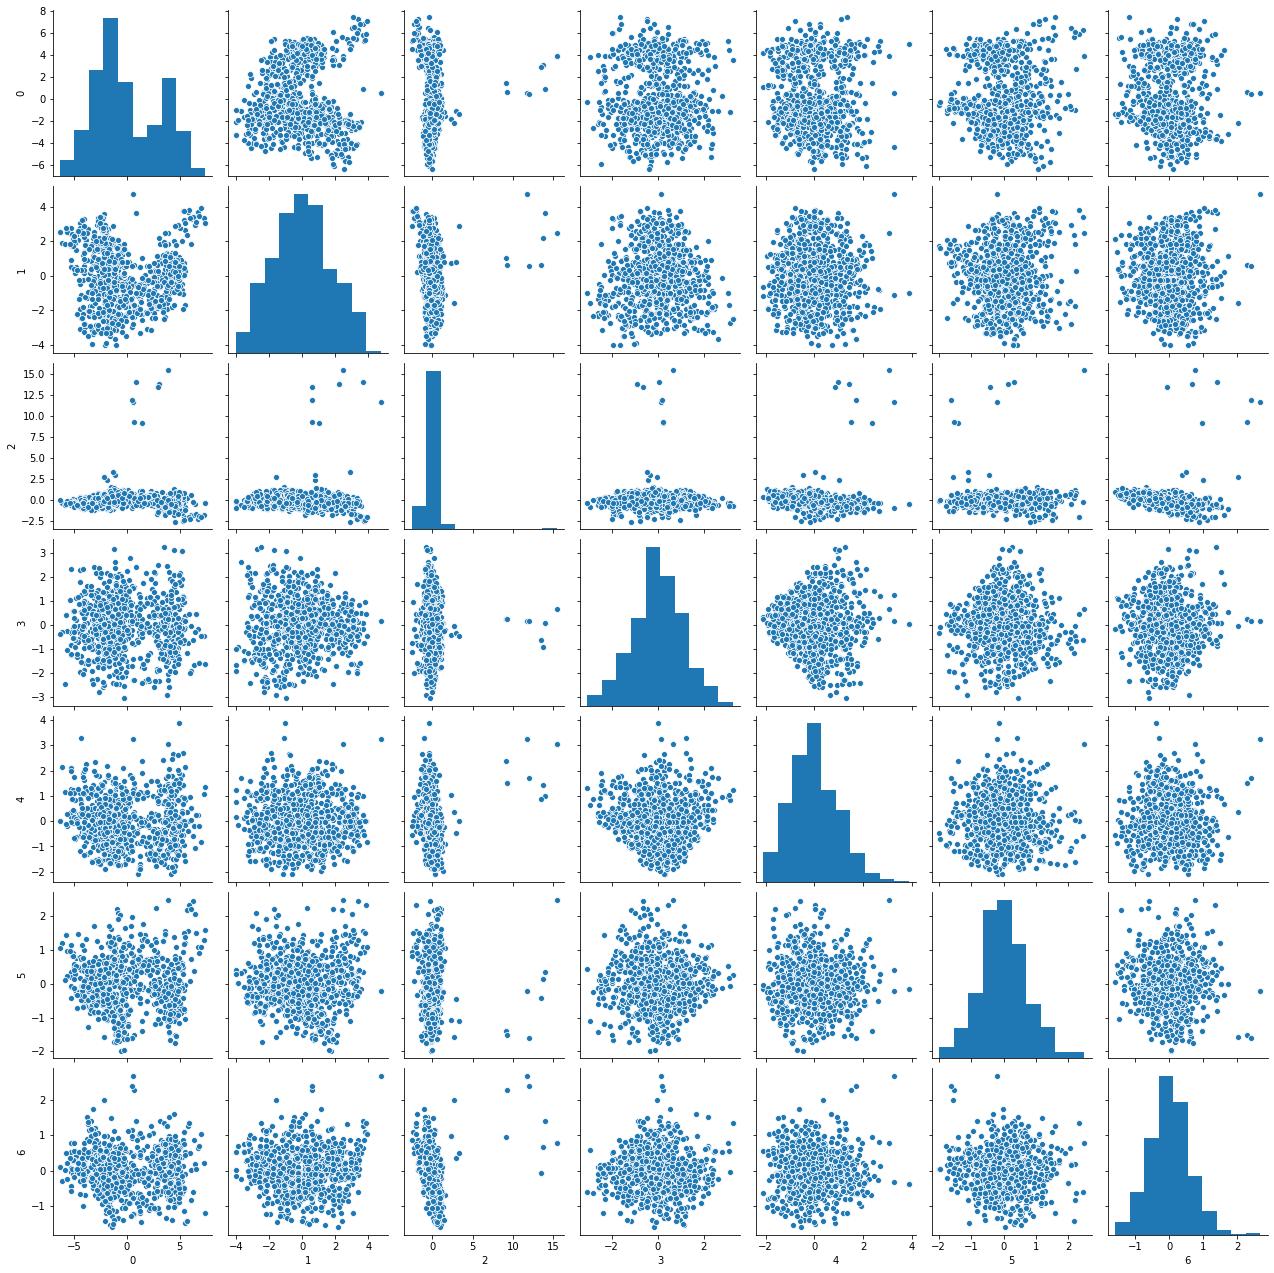

In [57]:
sns.pairplot(newcars_data)

<AxesSubplot:>

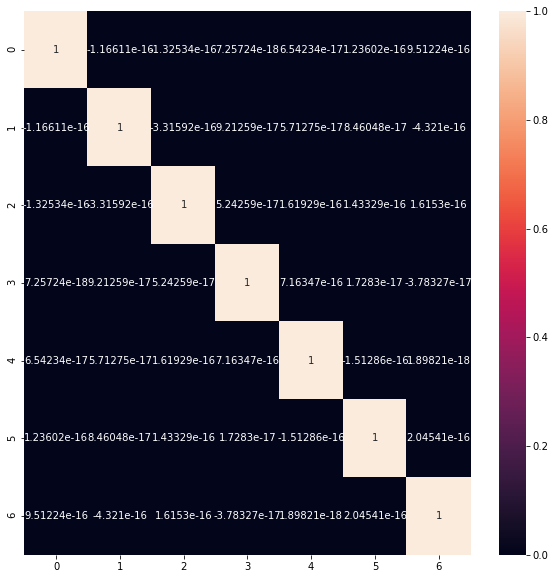

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(newcars_data.corr(), annot = True, fmt = 'g' )
#plt.savefig("Heatmap_3/heatmap for pca.jpg", dpi = 100, bbox_tight = True)

By seeing the heatmap we find that the correlation value between the components (0-6) are almost equal to zero. That means the newly formed dimensions or components are independent of each other 

### Train a Support vector machine using the Principal Components and get  the accuracy on the test set 

In [59]:
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca, y, test_size = 0.25, random_state = 1)
print(Xpca_train.shape, Xpca_test.shape, ypca_train.shape, ypca_test.shape)

(634, 7) (212, 7) (634,) (212,)


In [60]:
clf_2 = SVC()
clf_2.fit(Xpca_train, ypca_train)
pcapred=clf_2.predict(Xpca_test)

In [61]:
print('Test Accuracy',clf_2.score(Xpca_test,ypca_test))

print('Train Accuracy',clf_2.score(Xpca_train, ypca_train))

Test Accuracy 0.9292452830188679
Train Accuracy 0.9369085173501577


### Compare the accuracy scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (3 points)

In [62]:
# check the accuracy on the training data
print('Accuracy on Training data: ',clf_2.score(Xpca_train, ypca_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',clf_2.score(Xpca_test , ypca_test))
#Calculate the recall value 
print('Recall value: ',recall_score(ypca_test, pcapred, average='macro'))
#Calculate the precision value 
print('Precision value: ',precision_score(ypca_test,pcapred, average='macro'))
print("Confusion Matrix:\n",confusion_matrix(pcapred,ypca_test))
print("Classification Report:\n",classification_report(pcapred,ypca_test))

Accuracy on Training data:  0.9369085173501577
Accuracy on Testing data:  0.9292452830188679
Recall value:  0.9271529916037058
Precision value:  0.9256361929081464
Confusion Matrix:
 [[ 46   2   1]
 [  5 100   1]
 [  1   5  51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.93      0.94      0.94       106
           2       0.96      0.89      0.93        57

    accuracy                           0.93       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.93      0.93       212



CONCLUSION-----AFTER PCA, MODEL ACCURACY INCREASED FROM 66.98 TO 92.92% 
THIS IS BECAUSE WE REDUCED NO. OF DIMENSIONS FROM  18 TO 7, WE REDUCED CURSE OF DIMENSIONALITY & REMOVED FEATURES WHICH WERE CO-RELATED AMOG THEMSELVES TO GIVE BETTER SCORE